**2023 2023 La Serena School of Data Science **
# Classifying Radio Signals from SETI

*N. Hernitschek, 2023*


In this project, you will learn how to classify radio signal using an autoencoder (a specific CNN architecture),
how to display results and plot 2D spectrograms with Python in Jupyter Notebook.

The data we are going to use consists of 2D spectrograms of deep space radio signals collected by the Allen Telescope
Array at the SETI Institute. We will treat the spectrograms as images to train an image classification model to classify
the signals into one of four classes.

This Jupyter notebook includes an introduction to the software framework `Keras` and a small example project to get experience with `Keras`, before starting with the project on classifying radio signals.



---
## Contents


* [Python installation](#first-bullet)
* [Python Refresher](#second-bullet)
* [Good Coding Style](#third-bullet)
* [Software Frameworks for Neural Networks](#fourth-bullet)
* [Intro Project: Convolutional Neural Network (CNN)](#fifth-bullet)
* [Project: Classifying Radio Signals from SETI](#sixth-bullet)


In [1]:
from platform import python_version
import numpy
import scipy
import matplotlib
import sklearn

print("python version ",python_version(), " core programming language")
print("numpy version ",numpy.__version__, " efficient array operations")
print("scipy version ",scipy.__version__, " scientific computing tools")
print("matplotlib version ",matplotlib.__version__, " plotting and visualization")
print("sklearn version ",sklearn.__version__, " machine learning")

python version  3.7.16  core programming language
numpy version  1.21.5  efficient array operations
scipy version  1.7.3  scientific computing tools
matplotlib version  3.5.3  plotting and visualization
sklearn version  1.0.2  machine learning


### TensorFlow

https://www.tensorflow.org/



TensorFlow is tested and supported on the following 64-bit systems:

*    Python 3.7–3.10
*    Ubuntu 16.04 or later
*    Windows 7 or later (with C++ redistributable)
*    macOS 10.12.6 (Sierra) or later (no GPU support)
*    WSL2 via Windows 10 19044 or higher including GPUs (Experimental)


The installation guide can be found here:
https://www.tensorflow.org/install


TensorFlow can also be used on Google Colab (for testing purposes):
Run the TensorFlow tutorials directly, without any installation, in the browser with Colaboratory, a Google research project created to help disseminate machine learning education and research. It's a Jupyter notebook environment that requires no setup to use and runs entirely in the cloud.

https://www.tensorflow.org/tutorials

The TensorFlow tutorials are written as Jupyter notebooks and run directly in Google Colab. Just click the Run in Google Colab button. 


https://www.tensorflow.org/tutorials/quickstart/beginner

We're going through this example in Google Colab:
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb#scrollTo=7FP5258xjs-v
    
It uses the MNIST database of hand-written digits. 
In Google Colab, you can modify the code!

Here is a snipplet out of the above tutorial:

In [ ]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


this code builds a neural network with the following layers:
    
`Flatten`, `Dense`, `Dropout`, `Dense`


Sequential is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.
    
    

    
    
`Flatten`: used to flatten the input


`Dense`: a regular densely-connected NN layer
The numeric parameter is the dimensionality of the output space.
The standard activation of the `Dense` layer is None (ie. "linear" activation: $a(x) = x$). 


`Dropout`: a lyer with dropout
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by `1/(1 - rate)` such that the sum over all inputs is unchanged.
Note that the Dropout layer only applies when `training` is set to `True` such that no values are dropped during inference. When using `model.fit`, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer.
    
    

## 5. Intro Project: Convolutional Neural Network (CNN) <a class="anchor" id="fifth-bullet"></a>


(adapted from https://www.kaggle.com/code/ernie55ernie/mnist-with-keras-visualization-and-saliency-map)
    


This notebook contains the basic usage of keras and sklearn on the MNIST data set.
The four steps are:

1. Stratified shuffling split on training data set
2. Training and validating a CNN
3. plotting a confusion matrix
4. visualizing the convolution filters


There are 2 outputs

 *   Prediction csv on testing data
 *   Keras model


Before starting the code, download the files `test.csv` and `train.csv` from the above website.



In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# read input csv file
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')


In [4]:
X_train = []
Y_train = []
X_test = []

# reshape training data from rows into images
for index, row in train_df.iterrows():
    X_train.append(row.values[1 : ].reshape((28, 28, 1)))
    Y_train.append(row['label'])

# reshape testing data from rows into images
for index, row in test_df.iterrows():
    X_test.append(row.values.reshape((28, 28, 1)))

# normalization
X_train = np.array(X_train) / 255.
Y_train = np.array(Y_train)
X_test = np.array(X_test) / 255.

print('There are', X_train.shape[0], 'training data and', X_test.shape[0], 'testing data')
print('Number of occurence for each number in training data (0 stands for 10):')
print(np.vstack((np.unique(Y_train), np.bincount(Y_train))).T)


There are 42000 training data and 28000 testing data
Number of occurence for each number in training data (0 stands for 10):
[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


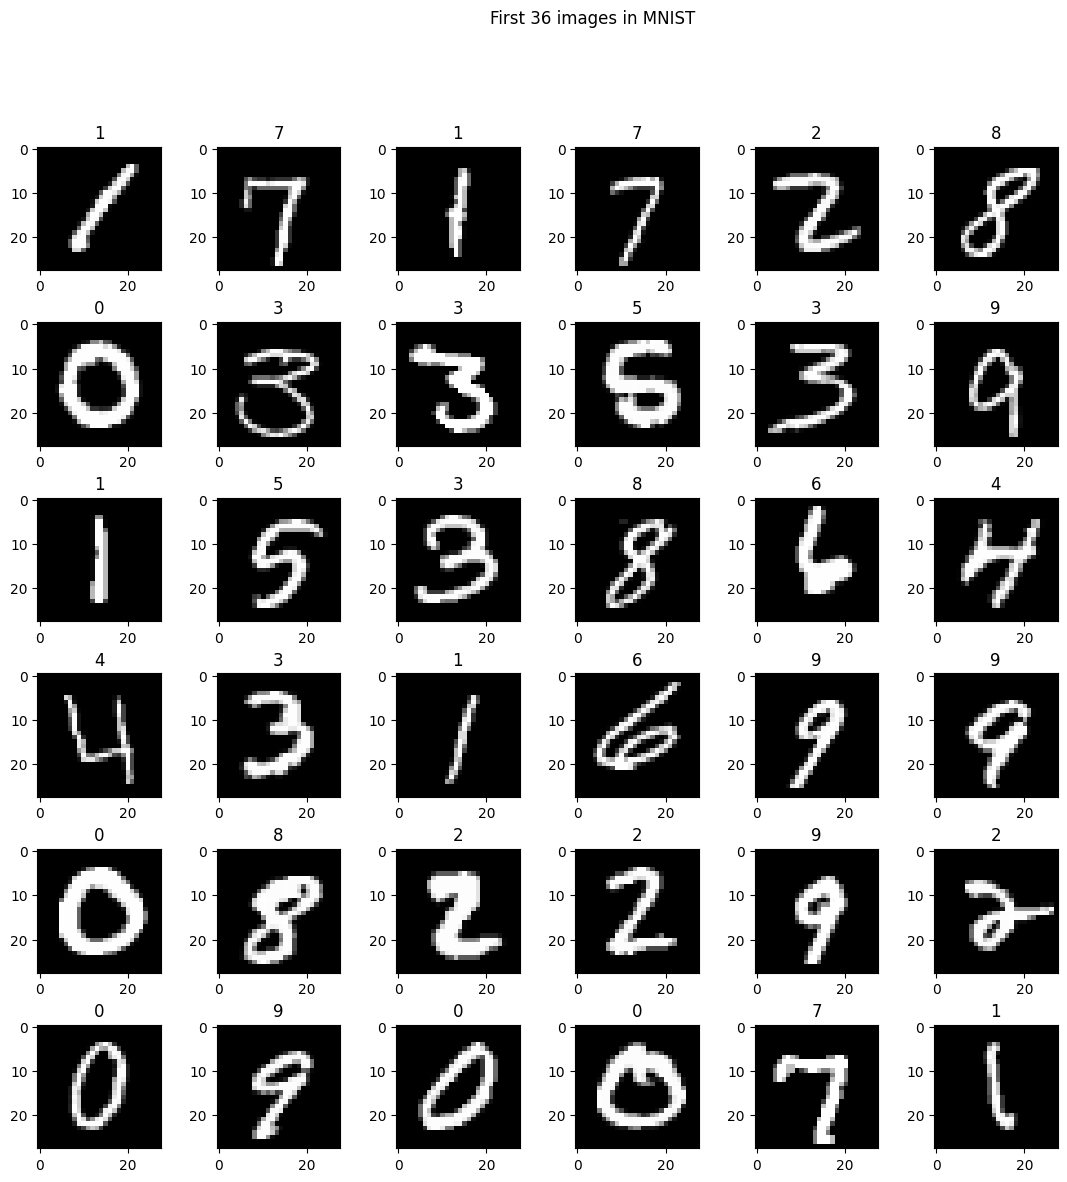

In [5]:
# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(X_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
    ax[x, y].set_title(Y_train[x + y * 6])

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

# transform training label to one-hot encoding
lb = preprocessing.LabelBinarizer()
lb.fit(Y_train)
Y_train = lb.transform(Y_train)

# split training and validating data
print('Stratified shuffling...')
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state = 15)
for train_idx, val_idx in sss.split(X_train, Y_train):
    X_train_tmp, X_val = X_train[train_idx], X_train[val_idx]
    Y_train_tmp, Y_val = Y_train[train_idx], Y_train[val_idx]

X_train = X_train_tmp
Y_train = Y_train_tmp
print('Finish stratified shuffling...')

Stratified shuffling...
Finish stratified shuffling...


You might need to install keras and tensorflow.


**Caution:** In case you encounter errors, often incompatibility of the certain libraries is the reason for that.
I suggest googling for that, and a combination of libraries that usually works can be installed like


`pip3 install tensorflow==2.12.0`
`pip install numpy==1.23`

I suggest after installing the libraries accordingly, try an import at the terminal window, and if `import keras`is sucessful: restart the Jupyter kernel and try whether it works in the Jupyter notebook.


### Model Building with Tensorflow

In [7]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

img_size = (28, 28, 1)
n_classes = 10

if os.path.exists('keras_model.h5'):
    print('Loading model...')
    model = load_model('keras_model.h5')
else:
    print('Building model...')
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape = img_size, kernel_initializer = 'normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(64, (5, 5), kernel_initializer = 'normal'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes))
    model.add(Activation('softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

2023-07-11 22:22:00.797867: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-11 22:22:00.842549: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-11 22:22:00.843481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-11 22:22:02.049730: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Building model...


In [8]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 0,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)

datagen.fit(X_train)

In the following, we are **training the model**. It should take about 15 minutes.

In [9]:
print('Training model...')
model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 1000),
                   epochs = 20,
                   validation_data = (X_val, Y_val),
                   steps_per_epoch = X_train.shape[0] / 1000,
                   verbose = 1)
print('Validating model...')
score, acc = model.evaluate(X_val, Y_val, verbose = 1)
print('\nLoss:', score, '\nAcc:', acc)
model.save('keras_model.h5')

Training model...


/tmp/ipykernel_95498/1702920462.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 1000),


Epoch 1/20


2023-07-11 22:22:44.021133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-07-11 22:22:44.926367: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73728000 exceeds 10% of free system memory.
2023-07-11 22:22:45.341279: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73728000 exceeds 10% of free system memory.



 1/33 [..............................] - ETA: 1:04 - loss: 2.3141 - accuracy: 0.0920

2023-07-11 22:22:46.027089: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73728000 exceeds 10% of free system memory.
2023-07-11 22:22:46.402793: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73728000 exceeds 10% of free system memory.


 3/33 [=>............................] - ETA: 14s - loss: 2.2539 - accuracy: 0.1538

2023-07-11 22:22:47.038390: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 73728000 exceeds 10% of free system memory.


33/33 [==============================] - 26s 744ms/step - loss: 1.4293 - accuracy: 0.5160 - val_loss: 0.3967 - val_accuracy: 0.9130
Epoch 2/20
33/33 [==============================] - 22s 658ms/step - loss: 0.6964 - accuracy: 0.7798 - val_loss: 0.2547 - val_accuracy: 0.9294
Epoch 3/20
33/33 [==============================] - 28s 838ms/step - loss: 0.4795 - accuracy: 0.8511 - val_loss: 0.1581 - val_accuracy: 0.9529
Epoch 4/20
33/33 [==============================] - 25s 746ms/step - loss: 0.3662 - accuracy: 0.8877 - val_loss: 0.1300 - val_accuracy: 0.9607
Epoch 5/20
33/33 [==============================] - 37s 1s/step - loss: 0.2892 - accuracy: 0.9134 - val_loss: 0.1046 - val_accuracy: 0.9669
Epoch 6/20
33/33 [==============================] - 27s 789ms/step - loss: 0.2495 - accuracy: 0.9257 - val_loss: 0.0835 - val_accuracy: 0.9746
Epoch 7/20
33/33 [==============================] - 22s 633ms/step - loss: 0.2278 - accuracy: 0.9322 - val_loss: 0.0717 - val_accuracy: 0.9781
Epoch 8/20
33

In [10]:
print('Predicting...')
Y_test = model.predict(X_test)
Y_test = lb.inverse_transform(Y_test)
Y_test = [[y] for y in Y_test]
index = [[i] for i in range(1, X_test.shape[0] + 1)]
output_np = np.concatenate((index, Y_test), axis = 1)
output_df = pd.DataFrame(data = output_np, columns = ['ImageId', 'Label'])
output_df.to_csv('out.csv', index = False)

Predicting...
875/875 [==============================] - 5s 6ms/step


263/263 [==============================] - 2s 6ms/step


Text(0.5, 21.34715460257995, 'Predicted label')

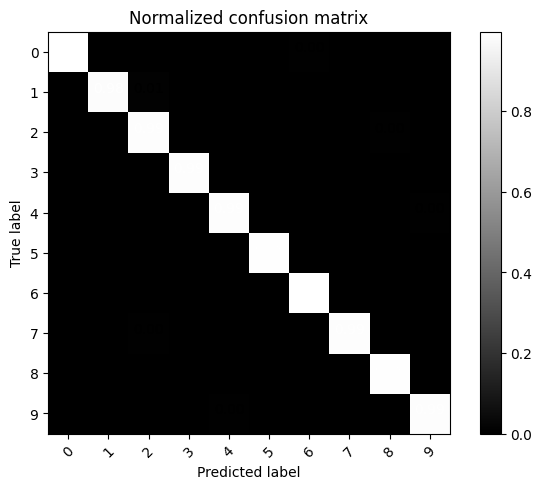

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

Y_pred = model.predict(X_val)
Y_val_pred = lb.inverse_transform(Y_pred)
Y_val_real = lb.inverse_transform(Y_val)
cm = confusion_matrix(Y_val_real, Y_val_pred)
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.imshow(cm, cmap = 'gray')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, np.arange(n_classes), rotation=45)
plt.yticks(tick_marks, np.arange(n_classes))

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

The confusion matrix looks great! In case you don't remember its purpose, look it up.

In [ ]:
# Visualizating filters


from keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

K.set_learning_phase(1)
import tensorflow as tf

model = load_model('keras_model.h5')

layer_dict = dict([(layer.name, layer) for layer in model.layers])
#print('Layer dict', layer_dict)
print(model.summary())

What happens internally? 

**Feature Visualization** translates the internal features present in an image into visually perceptible or recognizable image patterns. This helps us in understanding the learned features explicitly.

CNN uses learned filters to convolve the feature maps from the previous layer. Filters are two-dimensional weights and these weights have a spatial relationship with each other.

2023-07-11 22:37:40.955072: W tensorflow/c/c_api.cc:300] Operation '{name:'count_1/Assign' id:477 op device:{requested: '', assigned: ''} def:{{{node count_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count_1, count_1/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


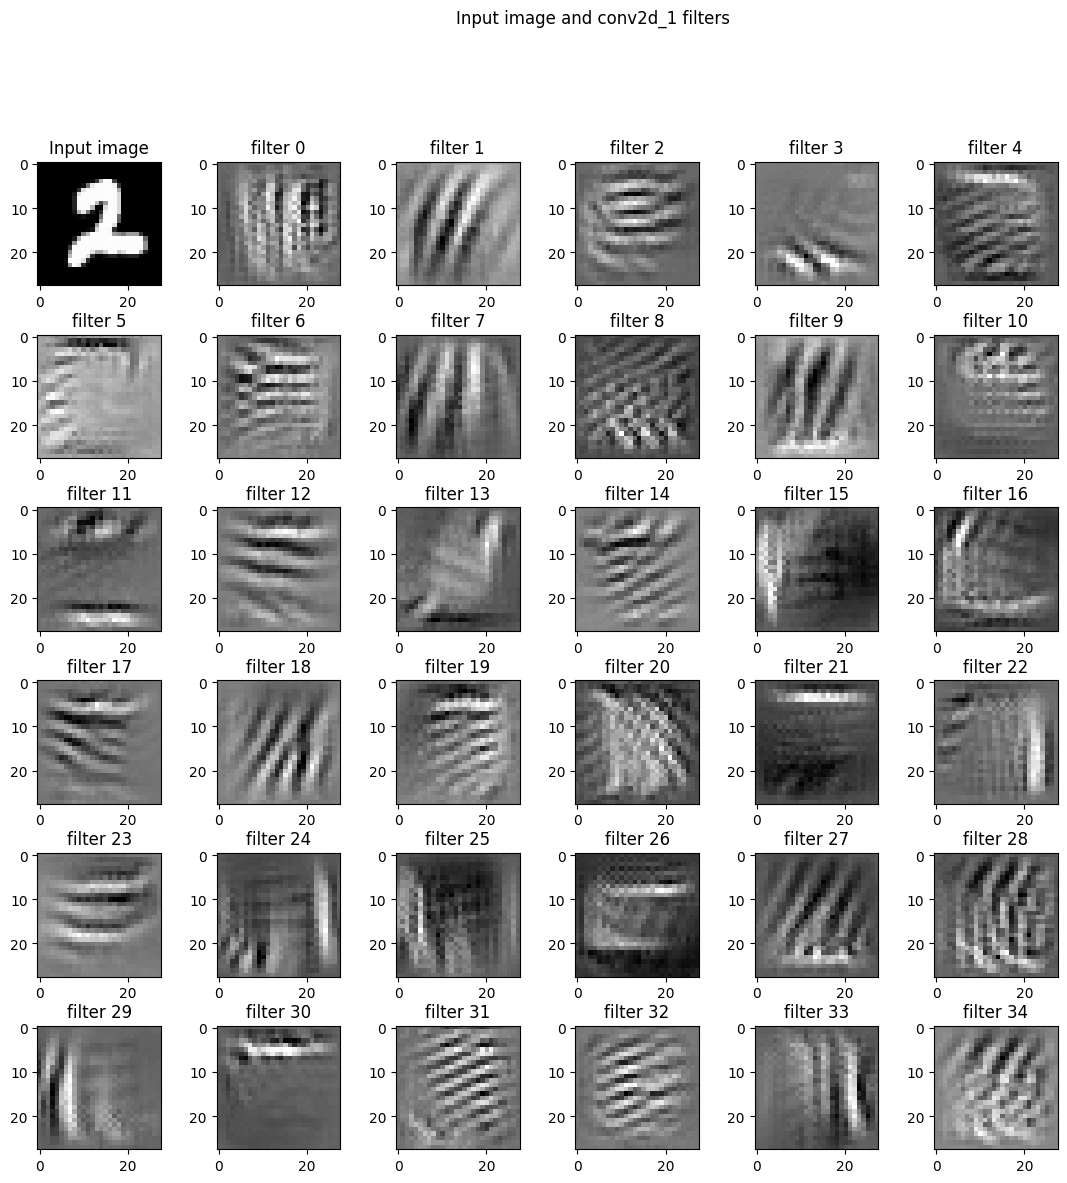

In [14]:


# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]
        
        #grads = K.GradientTape(loss, model.input)[0]
        
        

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

## 6. Project: Classifying Radio Signals from SETI <a class="anchor" id="sixth-bullet"></a>


Let's now start working on the project to classify radio signals from SETI.

In this project, you will use `Keras` with `TensorFlow` as its backend to solve an image classification problem.
This project also shows how data which are initially not in the form of images can be transformed to images to make learning in the form of image classification possible.


The data consists of deep space radio signals collected by the Allen Telescope Array at the SETI Institute. The spectrograms will be treated as images to train an image classification model to classify the signals into one of four classes. By the end of the project, you will have built and trained a convolutional neural network from scratch using Keras to classify signals from space.

### Importing Libraries

Before we import the libraries, we install `livelossplot`, a 
live training loss plot in Jupyter Notebook for Keras, PyTorch and other frameworks. This will make it much easier to follow the progress of training.

In [ ]:
!pip install livelossplot

In [40]:

from livelossplot.tf_keras import PlotLossesCallback
from livelossplot import PlotLossesKeras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.12.0


### Load and Preprocess SETI Data

These data come from Kaggle, the SETI-2D-DATA dataset. You can either download them here

https://www.kaggle.com/datasets/aquibiqbal/seti2ddata

or use them as included in the project folder.
They consist of a training and validation set with each the data (images) and labels. The labels are "one-hot" encoded, meaning the columns refer to the labels "squiggle", "narrowband", "noise", "narrowbanddrd" and the correct colum has value `1`.


In [41]:
train_images = pd.read_csv('dataset/train/images.csv', header=None)
train_labels = pd.read_csv('dataset/train/labels.csv', header=None) 

val_images = pd.read_csv('dataset/validation/images.csv', header=None)
val_labels = pd.read_csv('dataset/validation/labels.csv', header=None)

In [60]:
train_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412


In [43]:
train_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [44]:
val_images.head()

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.686275,0.725490,0.737255,0.694118,0.658824,0.674510,0.643137,0.752941,0.678431,0.654902,...,0.674510,0.709804,0.643137,0.674510,0.682353,0.658824,0.741176,0.658824,0.705882,0.701961
1,0.615686,0.631373,0.705882,0.678431,0.698039,0.639216,0.619608,0.654902,0.678431,0.682353,...,0.662745,0.674510,0.674510,0.721569,0.709804,0.666667,0.619608,0.709804,0.705882,0.682353
2,0.670588,0.690196,0.698039,0.647059,0.650980,0.670588,0.721569,0.701961,0.647059,0.678431,...,0.666667,0.670588,0.682353,0.698039,0.662745,0.619608,0.650980,0.662745,0.717647,0.650980
3,0.682353,0.650980,0.682353,0.670588,0.690196,0.701961,0.721569,0.709804,0.690196,0.650980,...,0.694118,0.737255,0.733333,0.717647,0.674510,0.678431,0.745098,0.705882,0.709804,0.717647
4,0.647059,0.690196,0.717647,0.666667,0.654902,0.639216,0.654902,0.674510,0.682353,0.674510,...,0.662745,0.682353,0.698039,0.705882,0.662745,0.678431,0.682353,0.725490,0.670588,0.658824


In [45]:
val_labels.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [46]:
print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)



Training set shape: (3200, 8192) (3200, 4)
Validation set shape: (800, 8192) (800, 4)


### Data Preparation

We now continue with data preparation to get the data into a form the CNN can work with.

In [47]:
# reshape the data into a shape that fits with CNN

x_train = train_images.values.reshape(3200, 64, 128, 1)
x_val = val_images.values.reshape(800, 64, 128, 1)

y_train = train_labels.values
y_val = val_labels.values



The data is converted into 2D spectrograms. A spectrogram shows frequency over time.
In the following, for illustrative purposes, we just take three data sets and plot them.



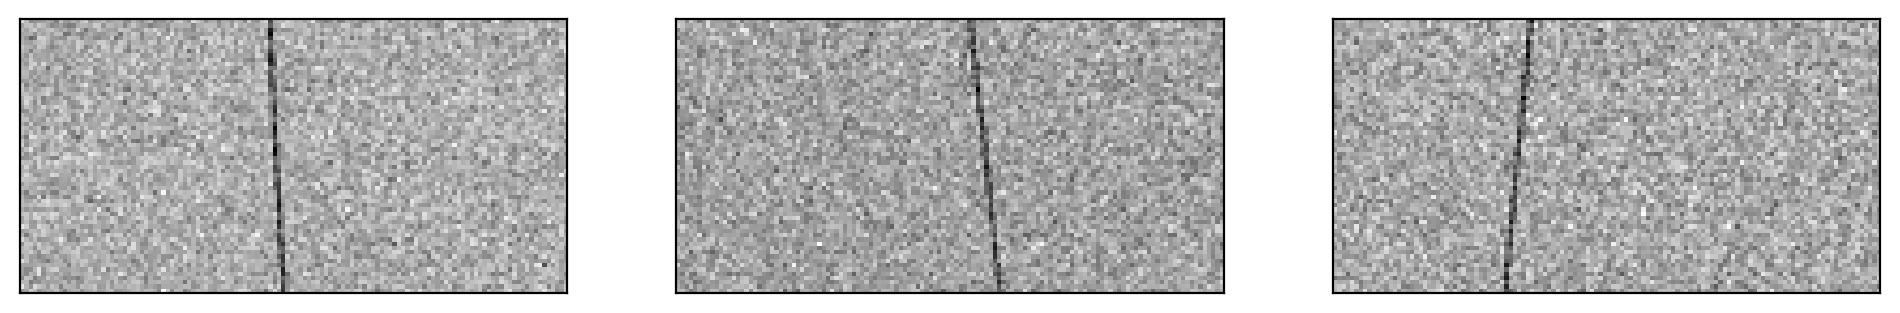

In [48]:
# Take 3 training images randomly and draw them 
plt.figure(0, figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = np.squeeze(x_train[np.random.randint(0, x_train.shape[0])]) 
    # np.squeeze is used to delete non-useful dimension in (64,128,1) 
    # and transform the shape into (64,128) in order to fit into plt.imshow
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap="gray")

### Create Training and Validation Data Generators

In certain cases it makes use to apply **data augmentation** to the training set. For this purpose, we make use of `ImageDataGenerator`. In this way, we can increase the size of the training set. It is always important to think about which transformations make sense for the application at hand. Example: For training a system that should recognize faces from a camera, a horizontally flipped image makes sense, but a vertically flipped image does not make sense.


After an input batch of images is presented to the `ImageDataGenerator`, the package applies a series of transformations (such as translations, rotations) to each image.
 The randomly transformed batch is then returned to the calling function.
 
 **Caution:** Apply data augmentation to both the training and validation data.


More information on this technique can be found at: https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/


In [49]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

datagen_train = ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_val)

### Creating the CNN Model

We can now make use of creating the CNN model. We can do so based on what we saw in the examples before, but constructing here a more complex model.

**Task**
Once you have succcessfully worked with a model, you can try to modify it:
* What about getting rid of Dropout? (If you don't know what Dropout is, look it up)
* What if we change the Pooling (If you don't know what Dropout is, look it up)?


Do you have explanations for the effects you see?


In [62]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [51]:
# Initialising the CNN
model = Sequential()

# 1st Convolution
model.add(Conv2D(32,(5,5), padding='same', input_shape=(64, 128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4, activation='softmax'))

As before, we **plot** the model.

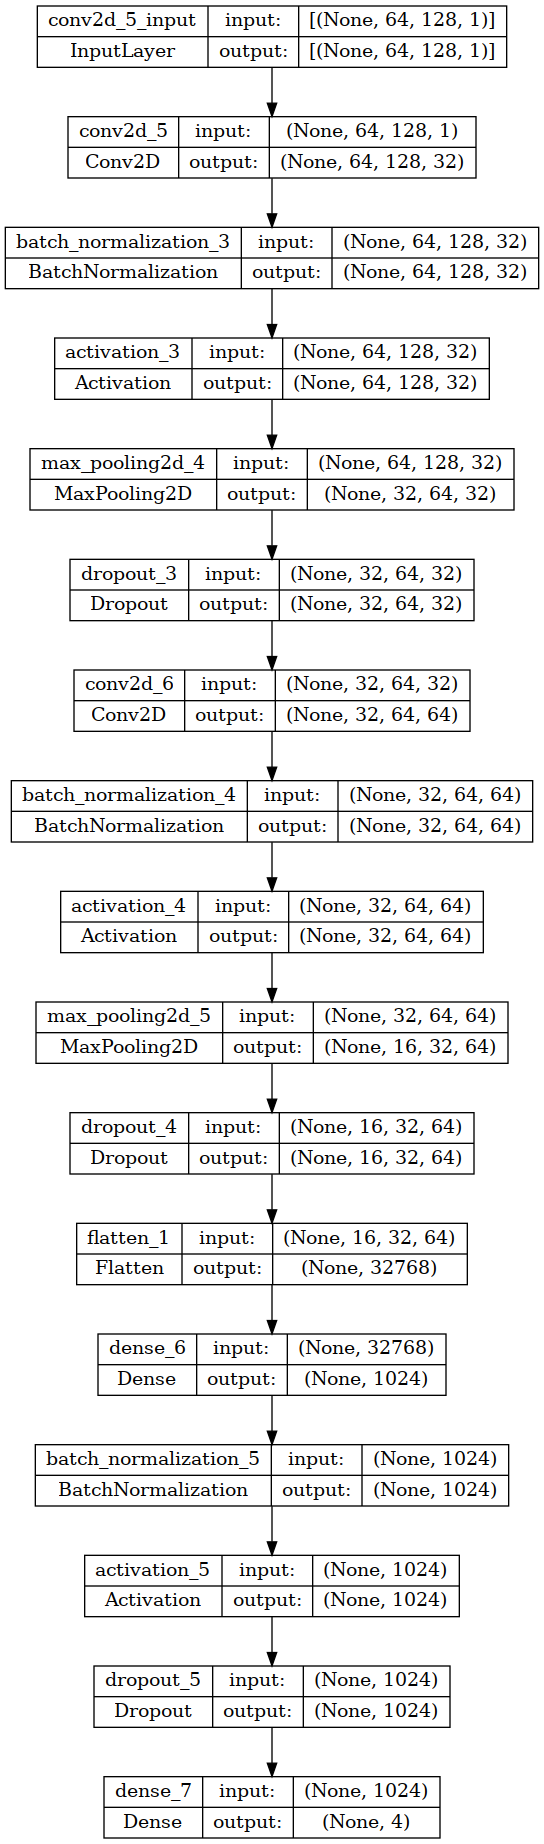

In [63]:
plot_model(model, to_file='cnn.png', show_shapes=True, show_layer_names=True)

### Learning Rate Scheduling and Compile the Model


Deep learning neural networks are trained using a **gradient descent optimizing algorithm**.

The **learning rate** is a hyperparameter that controls how much to change the model (= adjust the weights and biases in the CNN) in response to the estimated error. Choosing the learning rate is challenging: A value too small may result in a long training process that could possibly never (= not within a reasonable computing time) converge and thus gets stuck; a value too large may result in learning a sub-optimal set of weights too fast or to an unstable (oscillating) training process.

The learning rate may be the most important hyperparameter when configuring your neural network. Therefore it is vital to know how to investigate the effects of the learning rate on model performance and to build an intuition about the dynamics of the learning rate on model behavior.

When training a model, it is often useful to lower the learning rate as the training progresses. Here we want to apply an exponential decay function to an optimizer step, given a provided initial learning rate.

This model uses the Adam optimizer. We can pass an `tf.keras.optimizers.schedules.ExponentialDecay`object to which we can pass arguments.
The Adam optimizer is the extended version of stochastic gradient descent and is widely adopted for deep learning applications in computer vision and natural language processing.

The arguments are as follows:

| arguments | desc |
| :- | :- |
| `initial_learning_rate` | A scalar float32 or float64 Tensor or a Python number. The initial learning rate.   |
| `decay_steps`   | A scalar int32 or int64 Tensor or a Python number. Must be positive. See the decay computation above.    |
|`decay_rate`|A scalar float32 or float64 Tensor or a Python number. The decay rate.|
|`staircase`|Boolean. If True decay the learning rate at discrete intervals|
|`name`|	String. Optional name of the operation. Defaults to 'ExponentialDecay'. |

 	
 	



**Task:** Once you have trained your model and applied it, and you get a sufficient result, you can try to replace the Adam optimizer with a different one. How does your result change?




In [52]:
# Here, we have a initial learning rate that is fixed during first 5 steps and decreases exponentially afterwards
initial_learning_rate = 0.005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True)   

optimizer = Adam(learning_rate=lr_schedule)

In [64]:
# with this, we can compile the model and display the summary 

model.compile(optimizer=optimizer, 
    loss='categorical_crossentropy', metrics=['accuracy']
    ) # https://www.tutorialspoint.com/keras/keras_model_compilation.htm
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 128, 32)       832       
                                                                 
 batch_normalization_3 (Batc  (None, 64, 128, 32)      128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 64, 64)       

###  Training the Model


We will now train the model by using `model.fit`.

As we want to keep track of the training process by creating a loss plot that constantly updates (each epoch), we make use of the `livelossplot` which we installed earlier on.

**Caution:** If you see it eats up too much memory on your computer, stop the Jupyter notebook, remove 
in case this eats up too much memory, remove the `plotlosses` callback and start it again.


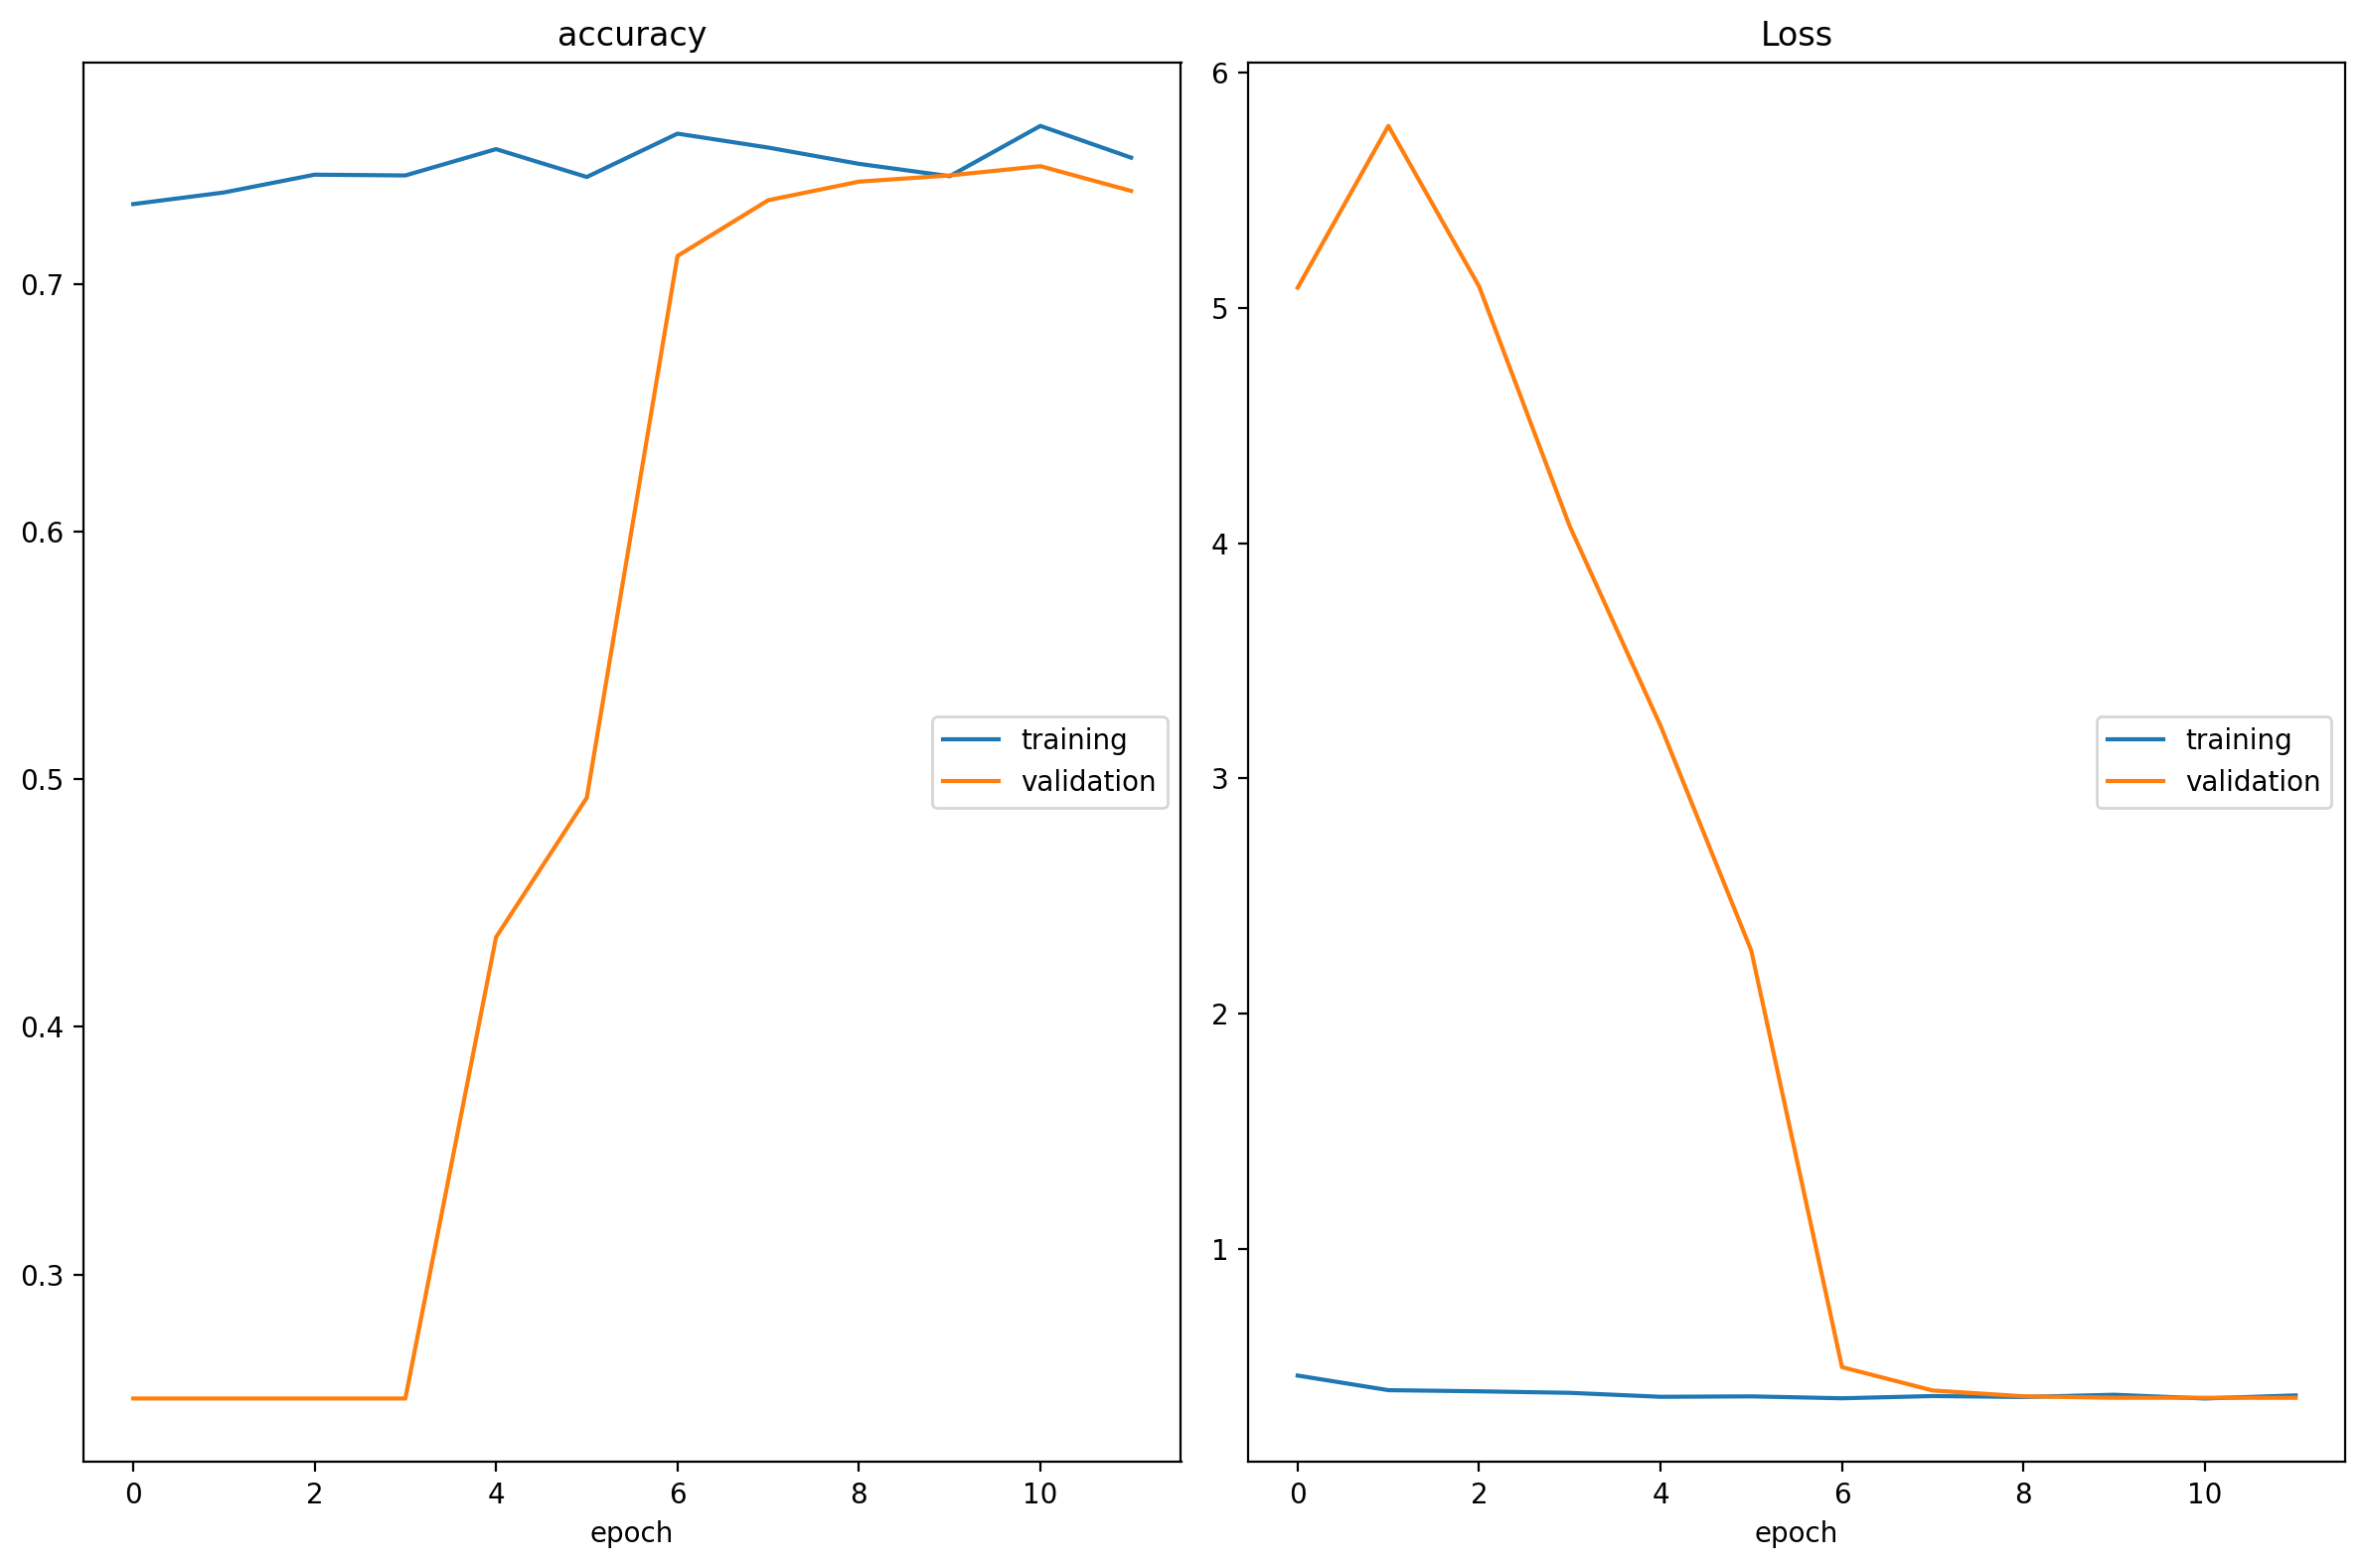

accuracy
	training         	 (min:    0.732, max:    0.764, cur:    0.751)
	validation       	 (min:    0.250, max:    0.748, cur:    0.738)
Loss
	training         	 (min:    0.363, max:    0.461, cur:    0.376)
	validation       	 (min:    0.366, max:    5.774, cur:    0.366)

100/100 [==============================] - 143s 1s/step - loss: 0.3763 - accuracy: 0.7509 - val_loss: 0.3659 - val_accuracy: 0.7375


In [56]:
# ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, 
#so the model or weights can be loaded later to continue the training from the state saved.
# Ref: https://keras.io/api/callbacks/model_checkpoint/
# https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6

plotlosses = PlotLossesKeras()

#checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_loss',
#                             save_weights_only=True, mode='min', verbose=0)
# PlotLossesCallback() is not supported by Tensorflow 2.2.
#callbacks = [PlotLossesKeras(), checkpoint]#, reduce_lr] 
batch_size = 32

history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(x_train)//batch_size,
    validation_data = datagen_val.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps = len(x_val)//batch_size,
    epochs=12,
    callbacks=[plotlosses]
)





**Task:** Describe the training process. What do the different curves tell you?

### Pickling the model

After learning, we pickle (save) the model.


A general advice: Training a CNN, like training any other kind of machine learning algorithm, takes longer than applying it. Thus after successful training, one should always save the trained model. This will not only ensure reasonable execution speed for applying the model, but also ensure that each time the model is applied to data indeed the same model is used.
    
    

In [66]:
import pickle

with open("model.bin", "wb") as f:
  pickle.dump(model, f)

#with open("model_saved.bin", "rb") as model:
#  cnn = pickle.load(model)


## Model Evaluation

How good is our model? There are a couple of methods for model evaluation.

We here show two commonly used methods: precision-recall and classification accuracy, as well as a confusin matrix.

In [57]:
model.evaluate(x_val, y_val)

25/25 [==============================] - 4s 151ms/step - loss: 0.3662 - accuracy: 0.7437


[0.366231769323349, 0.7437499761581421]

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

25/25 [==============================] - 4s 148ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       200
           1       0.49      0.92      0.64       200
           2       0.45      0.07      0.13       200
           3       1.00      1.00      1.00       200

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.69       800
weighted avg       0.74      0.74      0.69       800

Classification accuracy: 0.743750


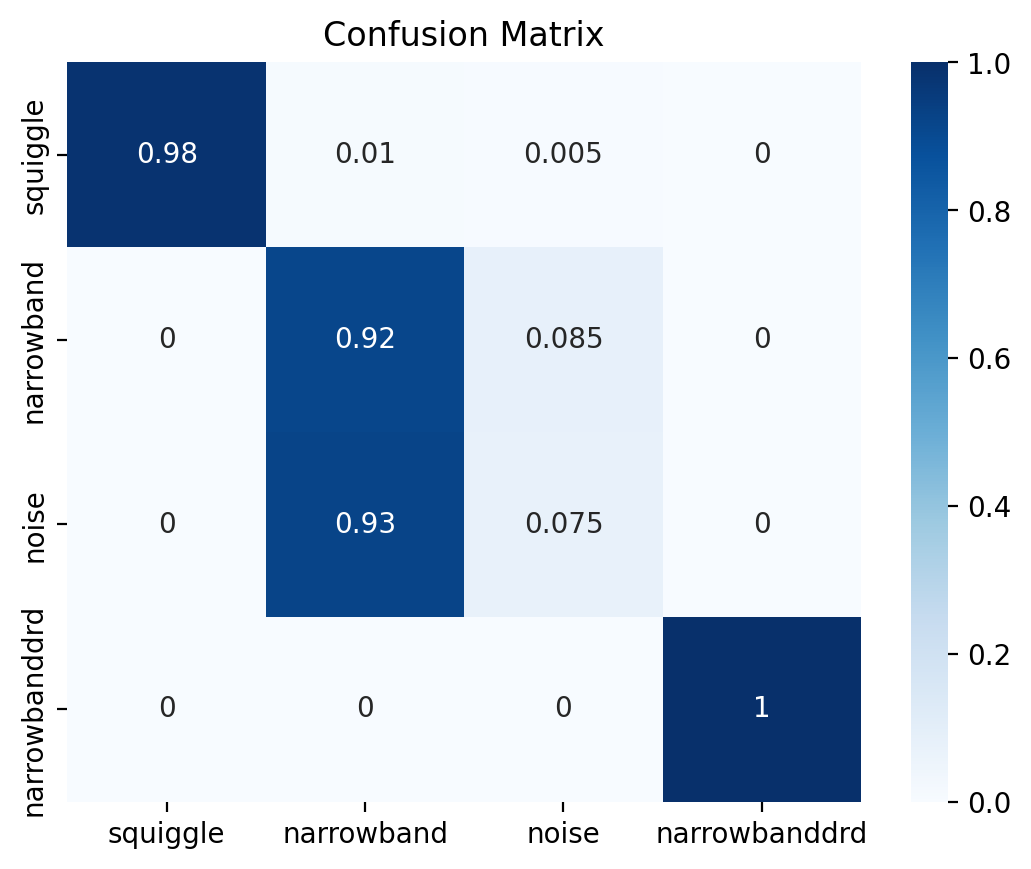

In [59]:
# Values of Recall from above confusion table can be seen on the diagonal below
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]

ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true, y_pred, normalize='true'), annot=True, ax = ax, cmap=plt.cm.Blues); #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


**Task:** Add at least one more method for model evaluation.

**Task:** Explain the results.


## Summary <a class="anchor" id="nineth-bullet"></a>

We have now a model that works well to classify the radio data.
The goal of the project so far was to show the basic steps to build an image classifier using convolutional neural network.
Building on this, the model could be optimized using hyperparameter tuning. 



## Further Tasks

After having a model that works reasonably well, go back to the **Tasks** throughout the Jupyter notebook. Many of them involve carrying out some hyperparamter tuning, or at least, testing out in general how the classifier performs once parameters are changed or methods are switched out.

Also, so far, the data were split in a training and validation set. How does the classifier perform on **unseen data**, i.e. data neither being part of the training or validation set? Modify the data sets accordingly.

Modify hyperparameters such as the training rate.
Modify the architecture of the neural network. Is there any room for improvement? How do you explain your results when trying to modify the architecture?